In [1]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Understanding the single image data and applying the operations

Loading Nibabel Images

In [3]:
TRAIN_DATASET_PATH = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [4]:
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [5]:
print(test_image_flair.max())

1.0


In [6]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

Loading Mask

In [8]:
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()

test_mask=test_mask.astype(np.uint8)

In [9]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)

[0 1 2 4]


In [10]:
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

[0 1 2 3]


Visualizing random Brain images and their segmented Mask

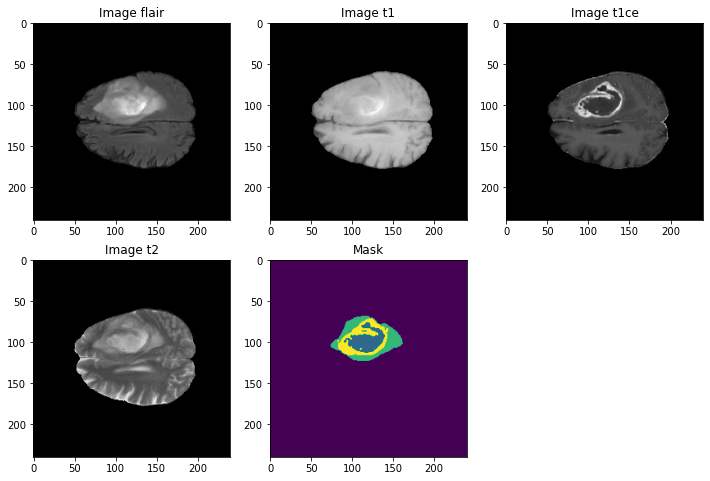

In [19]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

Now combining images to channels and divide them to patches


In [22]:
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

In [23]:
combined_x.shape

(240, 240, 155, 3)

In [24]:
combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4

In [25]:
#Do the same for mask
test_mask = test_mask[56:184, 56:184, 13:141]

Plot the images, but now you will see images little bit zoomed as unwanted edges are croped

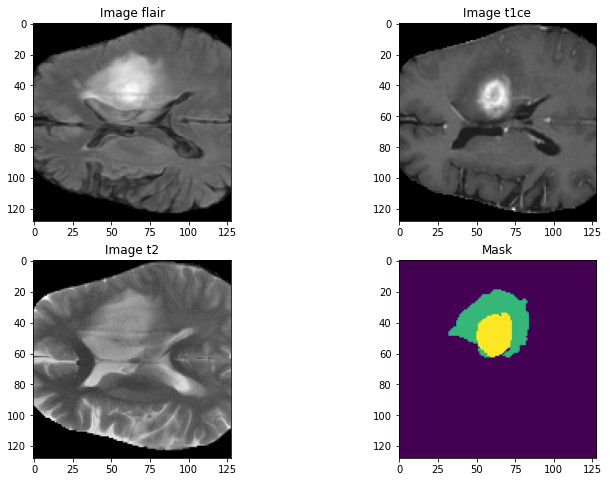

In [26]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')

plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')

plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')

plt.show()

Saving the combined image mask into numpy array or as a tif file.

In [27]:
imsave('BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('BraTS2020_TrainingData/combined255.npy', combined_x)

In [28]:
my_img=np.load('BraTS2020_TrainingData/combined255.npy')

In [29]:
my_img == combined_x # Both have same data

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

------------------------------------------------------------------------------------------------------------------------------

### Applying the same operations on all the images inside BraTS Training Data Folder


In [3]:
# # # images lists harley

#t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))

t2_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))

t1ce_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))

flair_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))

mask_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

In [4]:
print(t2_list[1]) 
print()
print(t1ce_list[1])
print()
print(flair_list[1])
print()
print(mask_list[1])

BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_002\BraTS20_Training_002_t2.nii

BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_002\BraTS20_Training_002_t1ce.nii

BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_002\BraTS20_Training_002_flair.nii

BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\BraTS20_Training_002\BraTS20_Training_002_seg.nii


In [5]:
for img in range(len(t2_list)):   #Using t2_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
    
#     Normalizing the pixel values of image between 0 to 1 using Minmax Scaler

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
    
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    
#     print(np.unique(temp_mask))

#     Combining t2_image, t1ce_image and flair_image into single combined_image with three channels t2,t1ce & flair 
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
        
#     croping the image into 128*128*128*3 - zooming the image and removing extra edges of image

    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141] #random trial and error
    
    temp_mask = temp_mask[56:184, 56:184, 13:141] #random trial and error
    
#     Removing unwanted images having mask segmentation is less than 1% ~ 0.01 
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 0.5% useful volume with labels that are not 0
        print("Save Me")
        
#         saving masks of each image which contain labels 0,1,2,3 in it in Numpy array format

        temp_mask= to_categorical(temp_mask, num_classes=4) # 0,1,2,3 classes
    
        np.save('BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

Save Me
Now preparing image and masks number:  162
Save Me
Now preparing image and masks number:  163
Save Me
Now preparing image and masks number:  164
Save Me
Now preparing image and masks number:  165
Save Me
Now preparing image and masks number:  166
Save Me
Now preparing image and masks number:  167
Save Me
Now preparing image and masks number:  168
Save Me
Now preparing image and masks number:  169
Save Me
Now preparing image and masks number:  170
Save Me
Now preparing image and masks number:  171
Save Me
Now preparing image and masks number:  172
Save Me
Now preparing image and masks number:  173
Save Me
Now preparing image and masks number:  174
Save Me
Now preparing image and masks number:  175
Save Me
Now preparing image and masks number:  176
I am useless
Now preparing image and masks number:  177
Save Me
Now preparing image and masks number:  178
Save Me
Now preparing image and masks number:  179
Save Me
Now preparing image and masks number:  180
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  322
Save Me
Now preparing image and masks number:  323
Save Me
Now preparing image and masks number:  324
I am useless
Now preparing image and masks number:  325
Save Me
Now preparing image and masks number:  326
Save Me
Now preparing image and masks number:  327
Save Me
Now preparing image and masks number:  328
Save Me
Now preparing image and masks number:  329
Save Me
Now preparing image and masks number:  330
Save Me
Now preparing image and masks number:  331
Save Me
Now preparing image and masks number:  332
Save Me
Now preparing image and masks number:  333
Save Me
Now preparing image and masks number:  334
Save Me
Now preparing image and masks number:  335
Save Me
Now preparing image and masks number:  336
Save Me
Now preparing image and masks number:  337
Save Me
Now preparing image and masks number:  338
Save Me
Now preparing image and masks number:  339
Save Me
Now preparing image and masks number:  340
I am useless
Now preparing

In [6]:
print(temp_combined_images.shape)
print(temp_mask.shape)

(128, 128, 128, 3)
(128, 128, 128, 4)


<h3> Splitting the data into train, test and val

In [7]:
# !pip install split-folders

In [8]:
import splitfolders  # or import split_folders

input_folder = 'BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'BraTS2020_TrainingData/input_data_128/'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 688 files [36:59,  3.23s/ files]


-------------------------------------------